# Films | Years | Budget and Gross

**My first ever project in pyhton**

It took me about a week of trying out pyhton (and googling every aspect I did not understand) to come up with that project. It uses the data set from kaggle - it has some missing values still, but overall it is quite a clean set.

https://www.kaggle.com/datasets/danielgrijalvas/movies

I was interested in trends over years and how the industry changed - my hypotheses was that besides the fact that it has grown we now also have few extremely highly budgeted productions compared to previous years - if possible I would love to find when that change happened if it did.

*to test my hyphotheses I decided to compare means and medians*

In [1]:
#importing all the needed libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv(r'C:\Users\andro\Downloads\archive\movies.csv')

In [3]:
mean_by_year = df.groupby('year')['gross'].mean()
median_by_year = df.groupby('year')['gross'].median()

In [4]:
mean_and_median = pd.merge(mean_by_year, median_by_year,right_index=True,left_index=True)

In [5]:
mean_and_median.rename(columns={'gross_x':'mean','gross_y':'median'},inplace=True)

In [6]:
yearly = mean_and_median

In [7]:
max_by_year = df.groupby('year')['gross'].max()
min_by_year = df.groupby('year')['gross'].min()

In [8]:
budget_by_year = pd.DataFrame({
    'mean': df.groupby('year')['budget'].mean(),
    'median': df.groupby('year')['budget'].median()
}, index= df.groupby('year')['budget'].mean().index)

In [9]:
budget_by_year.drop(2020,inplace=True,axis=0)

In [10]:
budget_max = df.groupby('year')['budget'].max().drop(2020)

In [11]:
grosss = df.loc[df.groupby('year')['gross'].idxmax()].set_index('year')
budgett = df.loc[df.groupby('year')['budget'].idxmax()].set_index('year')

(1978.0, 2020.0)

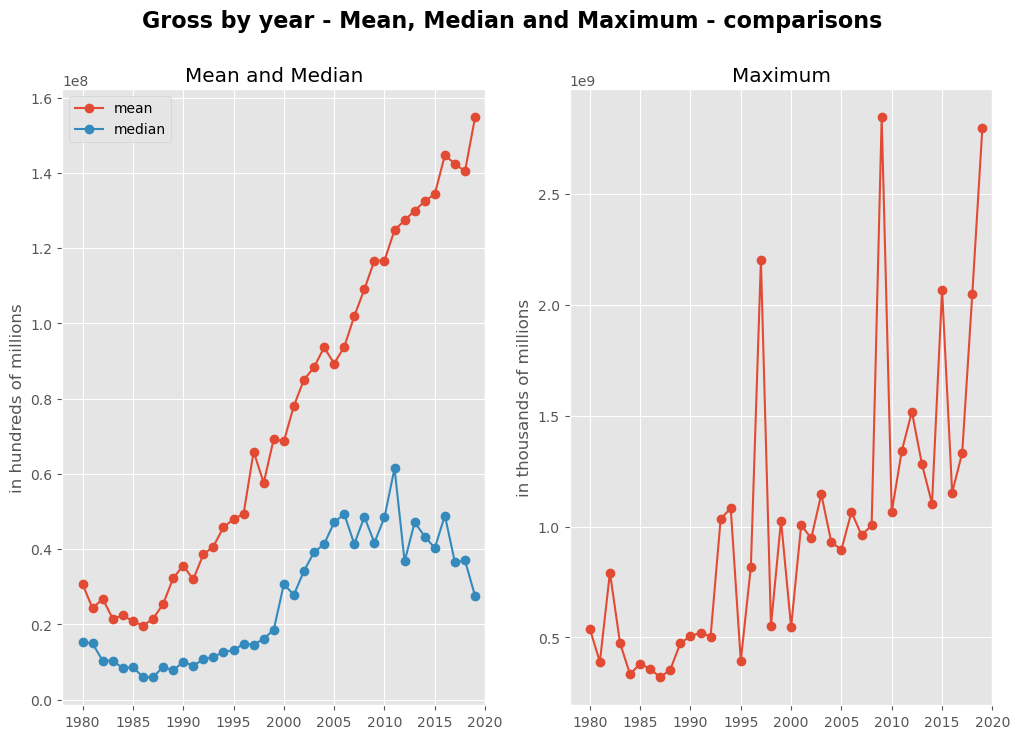

In [12]:
plt.suptitle('Gross by year - Mean, Median and Maximum - comparisons', size=16, weight = 'bold')

plt.subplot(1,2,1)
plt.plot(yearly.drop(2020,axis=0), marker = 'o')
plt.title('Mean and Median')
plt.legend(labels=yearly.columns)
plt.ylabel('in hundreds of millions')
plt.xlim(1978,2020)

plt.subplot(1,2,2)
plt.plot(max_by_year.drop(2020),marker='o')
plt.title('Maximum')
plt.ylabel('in thousands of millions')
plt.xlim(1978,2020)

Text(0.5, 1.0, 'Maximum')

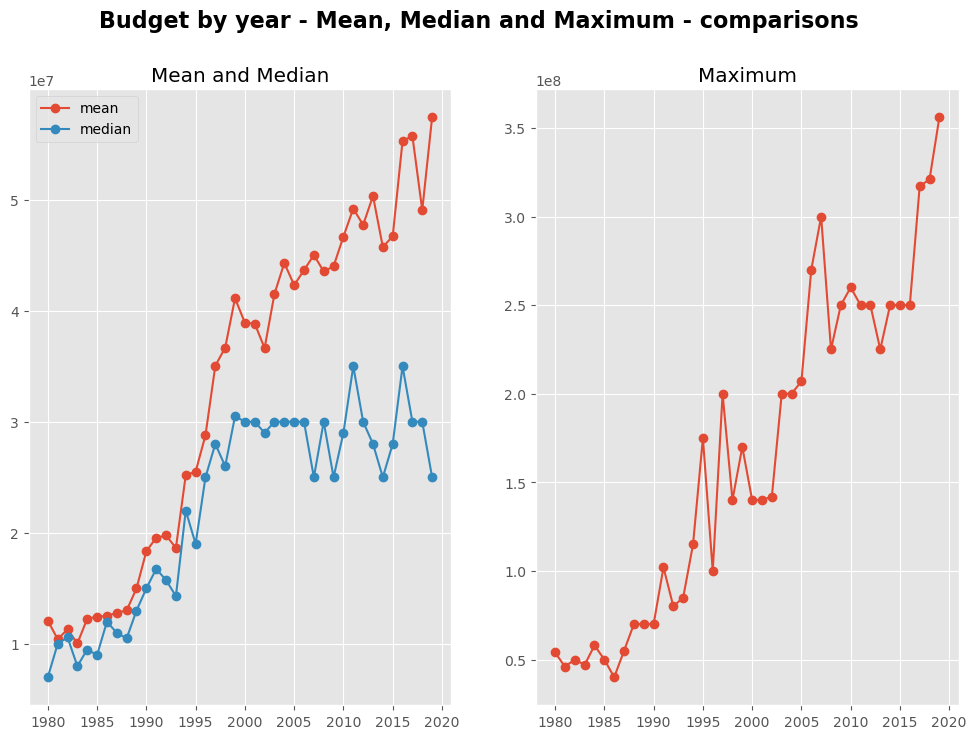

In [13]:
plt.suptitle('Budget by year - Mean, Median and Maximum - comparisons', size=16, weight = 'bold')

plt.subplot(1,2,1)
plt.plot(budget_by_year, marker = 'o')
plt.title('Mean and Median')
plt.legend(labels=budget_by_year.columns)

plt.subplot(1,2,2)
plt.plot(budget_max,marker='o')
plt.title('Maximum')

# Comments and thoughts on graphs : 

*Year 2020 is dropped from both graphs as it has insufficient number of films and results are extremely scewed from this year*

1. Difference between mean and median signalize about productions becoming more and more polarized - we have few extremely high-grossing and high-budget films when overall majority of films are ar away from them.

2. Looking closer at the Mean and Median Budget graph we can see that before the difference between mean and median were not that high - it became extrememe starting from 1997 where the difference between mean and median is almost 10 millions $ - it was "Titanic" and its success that changed overall tendency - the film industry realised that such extreme projects do bring more profit and since then this idea has never left the industry.

Text(0, 0.5, 'in hundreds of millions')

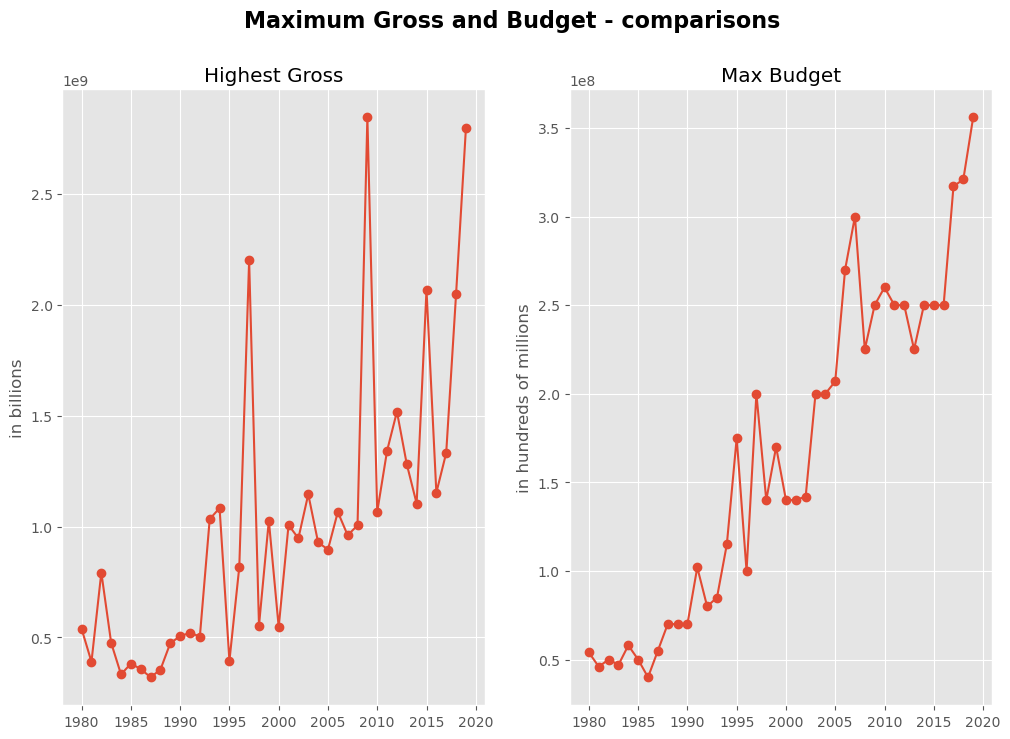

In [14]:
plt.suptitle('Maximum Gross and Budget - comparisons', size=16, weight = 'bold')

plt.subplot(1,2,1)
plt.plot(max_by_year.drop(2020),marker='o')
plt.title('Highest Gross')
plt.ylabel('in billions')

plt.subplot(1,2,2)
plt.plot(budget_max,marker='o')
plt.title('Max Budget')
plt.ylabel('in hundreds of millions')

## Outstanding!

#### The Highest Gross and Highest Budget graphs have some points that stand out - I marked them in graphs below

Text(2019, 2000000000.0, 'Avengers: Infinity War')

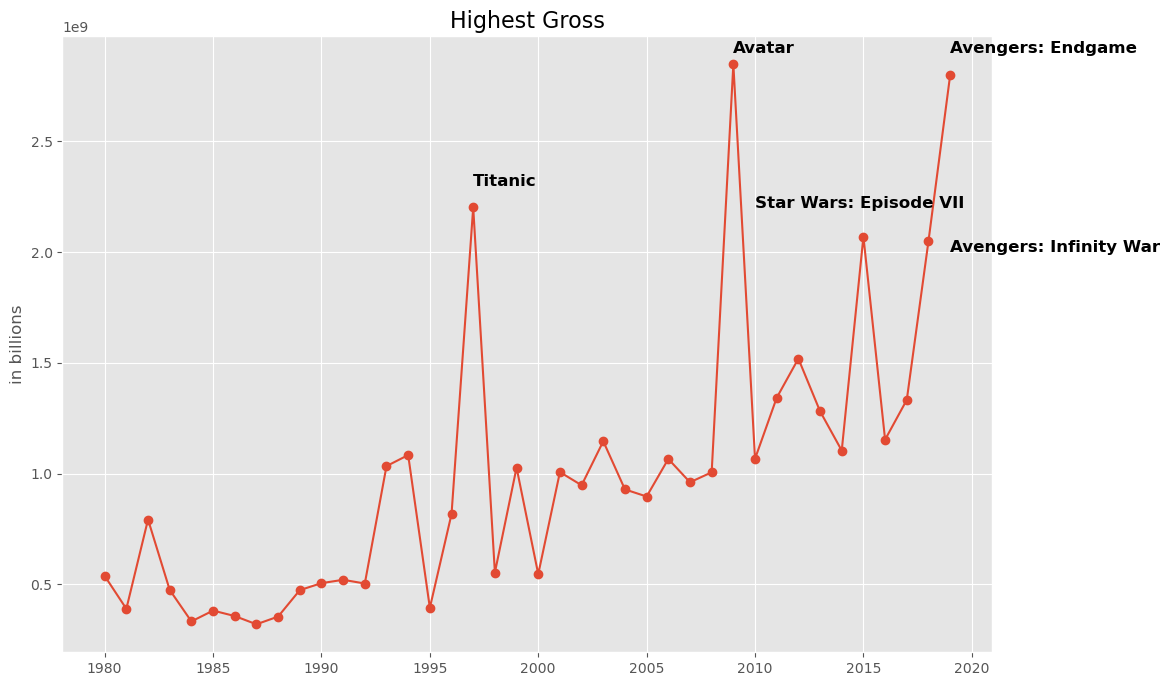

In [15]:
plt.plot(max_by_year.drop(2020),marker='o')
plt.title('Highest Gross',size=16)
plt.ylabel('in billions')
plt.annotate('Titanic', xy=(1997,2.3e+9), size=12, weight='bold')
plt.annotate('Avatar', xy=(2009,2.9e+9), size=12, weight='bold')
plt.annotate('Star Wars: Episode VII', xy=(2010,2.2e+9), size=12, weight='bold')
plt.annotate('Avengers: Endgame', xy=(2019,2.9e+9), size=12, weight='bold')
plt.annotate('Avengers: Infinity War', xy=(2019,2e+9), size=12, weight='bold')

Text(2015, 365000000.0, 'Avengers: Endgame')

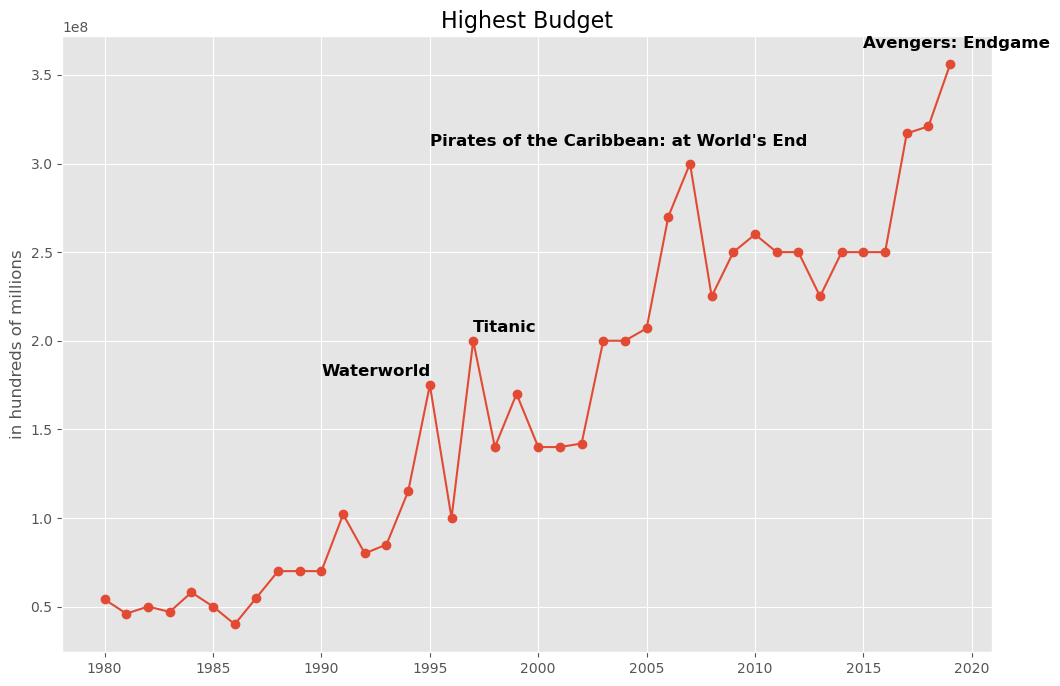

In [16]:
plt.plot(budget_max,marker='o')
plt.title('Highest Budget',size=16)
plt.ylabel('in hundreds of millions')
plt.annotate('Waterworld', xy=(1990,1.8e+8), size=12, weight='bold')
plt.annotate('Titanic', xy=(1997,2.05e+8), size=12, weight='bold')
plt.annotate("Pirates of the Caribbean: at World's End", xy=(1995,3.1e+8), size=12, weight='bold')
plt.annotate("Avengers: Endgame", xy=(2015,3.65e+8), size=12, weight='bold')

# Side by Side - Gross and Budget

In [17]:
namess = df.set_index('name')

In [18]:
list_of_highest = namess.groupby('year')[['gross','budget']].idxmax().rename(columns={'gross':'Highest Grossing Film', 'budget':'Highest Budget for a Film'})
list_of_highest

,Highest Grossing Film,Highest Budget for a Film
year,,
1980,Star Wars: Episode V - The Empire Strikes Back,Superman II
1981,Indiana Jones and the Raiders of the Lost Ark,Inchon
1982,E.T. the Extra-Terrestrial,Annie
1983,Star Wars: Episode VI - Return of the Jedi,Krull
1984,Indiana Jones and the Temple of Doom,The Cotton Club
1985,Back to the Future,Santa Claus: The Movie
1986,Top Gun,Pirates
1987,Fatal Attraction,Ishtar
1988,Rain Man,Who Framed Roger Rabbit


# At last - what films were both that year?

In [19]:
list_of_highest.loc[list_of_highest['Highest Grossing Film']==list_of_highest['Highest Budget for a Film']]

,Highest Grossing Film,Highest Budget for a Film
year,,
1991,Terminator 2: Judgment Day,Terminator 2: Judgment Day
1997,Titanic,Titanic
1998,Armageddon,Armageddon
2007,Pirates of the Caribbean: at World's End,Pirates of the Caribbean: at World's End
2016,Captain America: Civil War,Captain America: Civil War
2017,Star Wars: Episode VIII - The Last Jedi,Star Wars: Episode VIII - The Last Jedi
2018,Avengers: Infinity War,Avengers: Infinity War
2019,Avengers: Endgame,Avengers: Endgame


# Overview - Highest Grossing Film by year 

In [20]:
grosss

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
year,,,,,,,,,,,,,,
1980,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,5.383751e+08,Lucasfilm,124.0
1981,Indiana Jones and the Raiders of the Lost Ark,PG,Action,"June 12, 1981 (United States)",8.4,905000.0,Steven Spielberg,Lawrence Kasdan,Harrison Ford,United States,18000000.0,3.899260e+08,Paramount Pictures,115.0
1982,E.T. the Extra-Terrestrial,PG,Family,"June 11, 1982 (United States)",7.8,381000.0,Steven Spielberg,Melissa Mathison,Henry Thomas,United States,10500000.0,7.929106e+08,Universal Pictures,115.0
1983,Star Wars: Episode VI - Return of the Jedi,PG,Action,"May 25, 1983 (United States)",8.3,973000.0,Richard Marquand,Lawrence Kasdan,Mark Hamill,United States,32500000.0,4.751062e+08,Lucasfilm,131.0
1984,Indiana Jones and the Temple of Doom,PG,Action,"May 23, 1984 (United States)",7.5,459000.0,Steven Spielberg,Willard Huyck,Harrison Ford,United States,28000000.0,3.331073e+08,Paramount Pictures,118.0
1985,Back to the Future,PG,Adventure,"July 3, 1985 (United States)",8.5,1100000.0,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States,19000000.0,3.819068e+08,Universal Pictures,116.0
1986,Top Gun,PG,Action,"May 16, 1986 (United States)",6.9,306000.0,Tony Scott,Jim Cash,Tom Cruise,United States,15000000.0,3.572882e+08,Paramount Pictures,110.0
1987,Fatal Attraction,R,Drama,"September 18, 1987 (United States)",6.9,79000.0,Adrian Lyne,James Dearden,Michael Douglas,United States,14000000.0,3.201457e+08,Paramount Pictures,119.0
1988,Rain Man,R,Drama,"December 16, 1988 (United States)",8.0,483000.0,Barry Levinson,Barry Morrow,Dustin Hoffman,United States,25000000.0,3.548254e+08,United Artists,133.0


# Overview - Highest Budget for a film by year

In [21]:
budgett

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
year,,,,,,,,,,,,,,
1980,Superman II,PG,Action,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,1.081857e+08,Dovemead Films,127.0
1981,Inchon,PG,Drama,"September 17, 1982 (United States)",2.7,659.0,Terence Young,Robin Moore,Laurence Olivier,South Korea,46000000.0,5.200986e+06,One Way Productions,140.0
1982,Annie,PG,Comedy,"June 18, 1982 (United States)",6.6,41000.0,John Huston,Carol Sobieski,Aileen Quinn,United States,50000000.0,5.706386e+07,Columbia Pictures,127.0
1983,Krull,PG,Action,"July 29, 1983 (United States)",6.1,31000.0,Peter Yates,Stanford Sherman,Ken Marshall,United Kingdom,47000000.0,1.691662e+07,Columbia Pictures,121.0
1984,The Cotton Club,R,Crime,"December 14, 1984 (United States)",6.5,17000.0,Francis Ford Coppola,William Kennedy,Richard Gere,United States,58000000.0,2.592872e+07,Zoetrope Studios,127.0
1985,Santa Claus: The Movie,PG,Adventure,"November 27, 1985 (United States)",6.3,12000.0,Jeannot Szwarc,David Newman,Dudley Moore,United Kingdom,50000000.0,2.371729e+07,GGG,107.0
1986,Pirates,PG-13,Action,"July 18, 1986 (United States)",6.1,8100.0,Roman Polanski,John Brownjohn,Walter Matthau,France,40000000.0,1.641825e+06,Carthago Films S.a.r.l.,121.0
1987,Ishtar,PG-13,Action,"May 15, 1987 (United States)",4.5,11000.0,Elaine May,Elaine May,Warren Beatty,United States,55000000.0,1.437518e+07,Columbia Pictures,107.0
1988,Who Framed Roger Rabbit,PG,Animation,"June 22, 1988 (United States)",7.7,187000.0,Robert Zemeckis,Gary K. Wolf,Bob Hoskins,United States,70000000.0,3.298040e+08,Touchstone Pictures,104.0


# Thanks for reading till the end!

It was not an easy task for me - I learned python from scratch and applied some concepts from statistical analysis that I had learned way back in my life.

My dream for now is to become a Data Analyst and continue developing my analytical and programing skills! If you can help me with any of the points mentioned - then contact me - woud love to chat either about some job opportunities or about Data Analytics in general!